# Lab05: Examining the Pointy Game

This is a group activity.  I want you to work together in your groups and have *each* of you implement the experiment below.

When you are finished with your work, each member of the team should push their solutions (notebooks and pointy game modules) to their github repository under the folder `lab/05` (or whatever convention you are using to keep things organized).

You will need the following packages installed into your enviornment:

+ seaborn
+ scipy
+ pandas (should already be installed)

In [1]:
# The line below imports the module pointy_game but
# renames it in this notebook to PointyGame
import pointy_game as PointyGame

# The line below imports all global variables,
# functions, and classes from the strategy module
# We will be using the different game playing strats
# for exercise 04
from strategy import *


# We need to import the creature
from creature import Creature

# Import Pandas; we'll call it pd
import pandas as pd

# Let's import seaborn; we will use it for plotting
import seaborn as sns

# And matplot lib since we may need to modify some settings
import matplotlib.pyplot as plt

# Some experiments will require we randomly select from a collection
import random

# We'll need to use scipy for our statistical test
import scipy as sp

# We're going to use itertools to help us with our testing
import itertools

# Let's make the figures larger
from matplotlib import rcParams
rcParams['figure.figsize'] = [12,8]

## Experiment 04: World Size (Randomly, Corner Placement)

In this experiment, I'd like you to examine how the world's size effects its score.

By default the world in PointyGame is square.  Last class we used a 21 x 21 world.  What we are going to do for this experiment is change the world size and examine how that effects the creature's score.

Let's set some defaults:

    world_size = ???              # See below for what sizes of the world I'd like you to collect data for
    creature_start = ???          # As close to the middle as we can get based on world shape and size
    start_score = 1000            # The creature starts with 1000 units of energy
    creature_init_facing = random # The creature's initial facing will be a random value from the set('N', 'E', 'S', 'W')
    strategy = play_randomly      # Play with the locally greedy strategy

    replicates = 20               # We want 20 plays of the game for each world geometry treatment
    steps = 50                    # We want 50 plays (so 51 total steps)

    rewards = Default provided

The world size and shape is what we will be changing for each treatment.

Let's enumerate those treatments, the following values are width, height values for our PointyGame treatments followed by the cell at which you should place our creature:

<table>
<tr>
    <th>world_size</th>
    <th>creature_start</th>
</tr>
<tr>
    <td>9 ,9</td>
    <td>0, 0</td>
</t>
<tr>
    <td>19, 19</td>
    <td>0, 0</td>
</tr>
<tr>
    <td>29, 29</td>
    <td>0 ,0</td>
</tr>
<tr>
    <td>39,39</td>
    <td>0, 0</td>
</tr>
</table>

For each of the above treatments, I want you to collect the data for each step (including the initial step before play) for PointyGame and create a CSV file with the following column headings:


    world_width         # The width of the world
    world_height        # The height of the world
    creature_start_x    # The x start location of the creature
    creature_start_y    # The y start location of the creature
    initial_facing      # The initial facing of the creature
    start_score         # The start score of the creature
    replicate           # The replicate number
    step                # The current step, starting at 0 before the first play
    score               # The current score of the creature
    creature_x          # The current horizontal location of the creature
    creature_y          # The current vertical location of the creature
    points_matrix       # The current points matrix as a string

Aside from the treatment conditions listed, do not change any of the default values to play the game.


In [2]:
experiment_name = 'world-size-random-corner'  # This is the name of the experiment

## Play the game and collect the data
In the cell(s) below, I want you to play Pointy Game as described above, collecting the appropriate data and writing it out to a csv file named the value of the interpreted string `f'{experiment_name}-data.csv'`.  

Suggestion: You may want to write a function that will update (or collect) the data to concatenate into your data frame.  This helps keep your code a little less cluttered and has one central place data is collected to avoid bugs.

To select a random facing, use the [`random.choice`](https://docs.python.org/3/library/random.html#random.choice) method.

In [3]:
# Write your solution here
# Because we didn't specify the data types, we may
# need to infer the outputs.  To do this, if your data
# frame was called df, include the code:
#   df = df.infer_objects()
# when you are done constructing the data frame
# to make sure the data types are correct
column_list = ['world_width','world_height','creature_start_x','creature_start_y','initial_facing','start_score','replicate','step','score','creature_x','creature_y','points_matrix']
creature_start = (0,0) #Based on size, fix this
start_score = 1000
strategy = play_randomly
treatment = 'random'

replicates = 20
steps = 50

world_size = [(9,9),(19,19),(29,29),(39,39)]


def collect_data(creature, world_size, initial_facing, replicate, step,points_matrix_str, creature_start = creature_start, starting_score=start_score):
    data_dict = {}
    data_dict[column_list[0]] = world_size[0]
    data_dict[column_list[1]] = world_size[1]
    data_dict[column_list[2]] = creature_start[0]
    data_dict[column_list[3]] = creature_start[1]
    data_dict[column_list[4]] = initial_facing
    data_dict[column_list[5]] = starting_score
    data_dict[column_list[6]] = replicate
    data_dict[column_list[7]] = step
    data_dict[column_list[8]] = creature.score
    data_dict[column_list[9]] = creature.current_location[0]
    data_dict[column_list[10]] = creature.current_location[1]
    data_dict[column_list[11]] = points_matrix_str
    return data_dict


    
df = pd.DataFrame(columns=column_list)

for board_size in world_size:
    for replicate in range(0,replicates):
        init_direction = random.choice(['N','W','E','S'])
        creature = Creature(start_score, board_size, creature_start, init_facing=init_direction)
        game = PointyGame.Game(board_size, creature)
        data = collect_data(creature, board_size, init_direction, replicate, 0, str(game.points_matrix()))
        df = df.append(data, ignore_index=True)
        for step in range(1,(steps + 1)):
            continue_game = game.play(strategy)
            data = collect_data(creature, board_size, init_direction, replicate, step, str(game.points_matrix()))
            df = df.append(data, ignore_index=True)
            if continue_game:
                break

df.to_csv(f'{experiment_name}-data.csv')

## Examining the data

I would like you to describe the data you have collected:

+ How many replicates were there for each treatment?  (Yes this was set.  But it is good practice to examine your data.)  Examine DataFrame's [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) method to assist you.  You may want to take a look at [this page](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html) to help you.  The aggregation method `nunique` will count the number of unique elements.
+ What was the average score for each treatment?  Again, groupby will help you.
+ What was the final score for each treatment?  We'll use sorting and removing duplicates to collect the final score for each replicate.


In [4]:
# Number of replicates by treatment
df = df.infer_objects()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   world_width       160 non-null    int64 
 1   world_height      160 non-null    int64 
 2   creature_start_x  160 non-null    int64 
 3   creature_start_y  160 non-null    int64 
 4   initial_facing    160 non-null    object
 5   start_score       160 non-null    int64 
 6   replicate         160 non-null    int64 
 7   step              160 non-null    int64 
 8   score             160 non-null    int64 
 9   creature_x        160 non-null    int64 
 10  creature_y        160 non-null    int64 
 11  points_matrix     160 non-null    object
dtypes: int64(10), object(2)
memory usage: 15.1+ KB


In [5]:
treatments = df.groupby(['world_width','world_height'])
treatments['replicate'].nunique()

world_width  world_height
9            9               20
19           19              20
29           29              20
39           39              20
Name: replicate, dtype: int64

In [6]:
# Average (mean) score by treatment
treatments['score'].mean()

world_width  world_height
9            9                995.250
19           19               991.500
29           29              1000.500
39           39              1003.625
Name: score, dtype: float64

In [10]:
treatments['score'].agg(['mean','median','max','min'])

,,mean,median,max,min
world_width,world_height,,,,
9,9,995.250,1000,1045,895
19,19,991.500,1000,1190,860
29,29,1000.500,1000,1095,890
39,39,1003.625,1000,1095,890


In [ ]:
# Examine the maximum number of steps for each treatment's replicates
# You may need to create a new groupby that groups by width, height, and replicate
# Open this variable up in a data explorer to see if it matches your expectations
# or print it out.  If you are in VSCode you can explore the results using the data
# viewer by clicking on the "expand" icon in the variable viewer
max_step = df.groupby(['world_width','world_height','replicate'])
max_step['step'].max()

world_width  world_height  replicate
9            9             0            50
                           1            50
                           2            50
                           3            50
                           4            50
                                        ..
39           39            15           50
                           16           50
                           17           50
                           18           50
                           19           50
Name: step, Length: 80, dtype: int64

In [11]:
# Let's try to gather the final score for each replicate in each treatment
# Let's use sort_values to sort our data frame by world_width and then by world_height (ascending)
# then by replicate (ascending) and step (descending).  We will then use drop_duplicates to
# get the highest step by removing those rows with the same world_height, world_width, and repliate
# and keeping just the row with the highest step.  This is our last step.

# To sort by multiple values, we can supply a list where each successive
# string is a key to sort by.  It sorts by the first key first, then by the second
# key and so on.  You can use a list of Boolean values (True or False) to change the
# flags for each sort key in your list.

final_steps = df.sort_values(
    ['world_width','world_height','replicate','step'], 
    ascending=[True,True,True,False]
    )

#Now that we have the dataframe sorted, drop all non-50 steps

final_steps = final_steps.drop_duplicates(
    subset=['world_width','world_height','replicate']
)

#This drops all combinations of world size and replicate after the first appearance, since we
# have it sorted so step 50 appears first, only step 50 for each replicate for each world size remain

## Plotting our results

Looking at text is fine.  But "plotting the hell" out of the data is often better.  

Let's make some plots.  We'll be using the package seaborn which makes matplotlib easier to use for data analysis applications.

### Plot all replicate scores over steps by treatment.

What we first want is a single line plot for each treatment.  Each plot will have one line per replicate.  The x-value is the step and the y-value is the score.  So for a single treatment we should have 20 lines.

Seaborn is great, but we will have to set some flags to get this to work as it tries to give us summary data when we're dealing with multiple replicates.  For now, we just want individual lines and not some type of summary.

Follow the comments in the cells below to assist you.

In [12]:
# First let's make sure we have data grouped by treatment as we did above.
# Let's group it by world_width and world_height

by_treatment = df.groupby(['world_width','world_height'])

In [13]:
# Now let's split that dataframe into a data frame for each treatment
# Let's say the variable you created in the previous cell is called by_treatment.
# We can split that data frame up by making our own dictionary of
# data frames keyed by the treatment.  Let's call it treatment_dict
# treatment_dict =  {key:by_treatment.get_group(key) for key in by_treatment.groups}

treatment_dict =  {key:by_treatment.get_group(key) for key in by_treatment.groups}

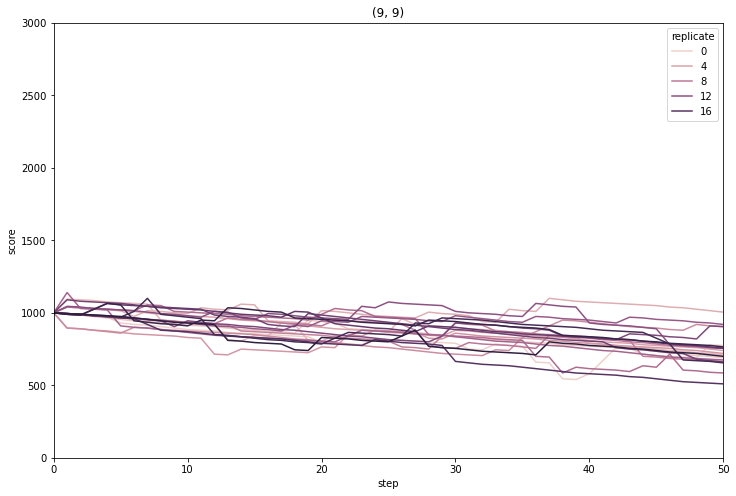

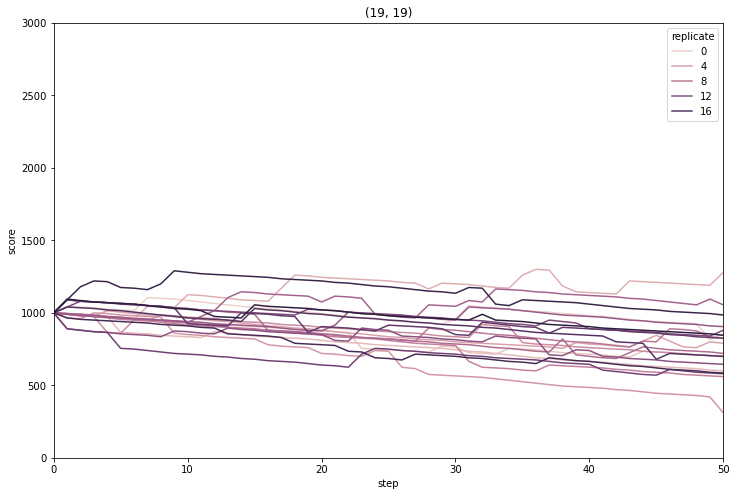

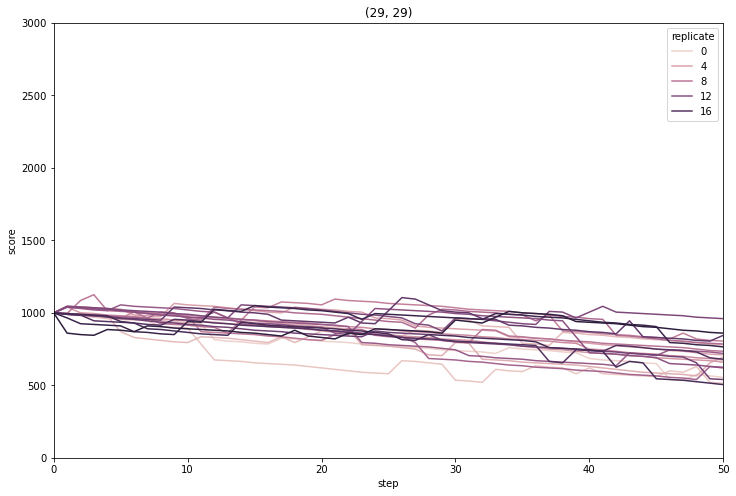

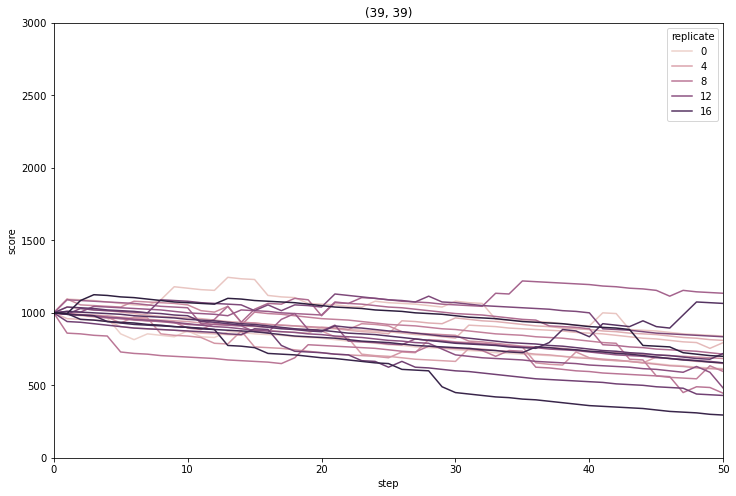

In [18]:
# Now let's plot each entry in our dictionary
# Remember: the key of our dictionary is our treatment
# and the value is the dataframe containing that treatment

# We will be using seaborn's lineplot function

# Write a loop that goes over each key value pair  in treatment_dict
# and plot the values.  
#
# It will be useful if you pull up seaborn's lineplot documentation

# The `data` argument  will be the value of the treatment_dict
# the title will be the key, the `x` argument will be the step
# and the `y` argument will be the score.  `hue` will be replicate
# (it acts as a groupby).  Also set the `estimator` argument
# to None since we want to see each individual replicate.

# You can use a loop to loop over all key,value pairs in the treatment
# dictionary you created above making sure to use the `item` method.  

# Use `plt.figure()` each time through your loop to create a new figure
# (by default seaborn will try to plot on the same figure).

# You can use plt.title to set the title for each graph to the
# treatment name

# Let's also force our scales to be the same using:
# plt.ylim(0,3000)
# plt.xlim(0,50)


for treatment in by_treatment.groups.keys():
    data = by_treatment.get_group(treatment)
    plt.figure()
    sns.lineplot(data=data, x='step', y='score', hue='replicate',estimator=None)
    plt.title(treatment)
    plt.xlim(0,50)
    plt.ylim(0,3000)

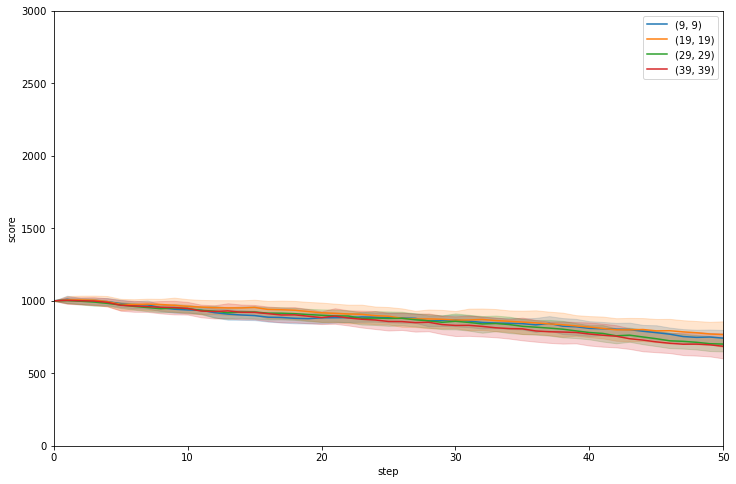

In [19]:
# Now we should have a graph for each of our treatments
# showing the score over time.  There will be one line
# per replicate.  We can combine these plots into
# a single plot if we'd like.  Let's try that again but
# this time use the treatment name (dictionary key) as the 
# `hue` and get rid of extra calls to plt.figure().

# We'll use the lineplot arguments: data, x, y, and label
# to plot the above plots all in one with the appropriate
# label.  Also use the argument: `estimator='mean'`.  We'll
# also get the 95% confidence interval around that value
# in a lighter shade.

# In the end you'll have one plot with colored lines and
# confidence intervals for each treatment
plt.figure()

for treatment in by_treatment.groups.keys():
    data = by_treatment.get_group(treatment)
    sns.lineplot(data=data, x='step', y='score', estimator='mean',label=treatment)
    plt.xlim(0,50)
    plt.ylim(0,3000)

## Statistically testing the difference between treatments

We're going to us a statistical test to determine whether or not there are statically different outcomes based on treatment. 

We'll do two things to check this: first we'll use what's called a violin plot to see what the distributions of the different treatments look like. Then we'll use a statistical test to see whether or not we can say with some confidence how different the distributions are.

First we will begin with a violin plot.  A violin plot is like a traditional box and whisker plot but it shows the distribution of values in addition to their range.

**We're interested in the final scores of our games from here on out.  We want to answer the question "Are there significant differences between treatments?"**

<AxesSubplot:ylabel='score'>

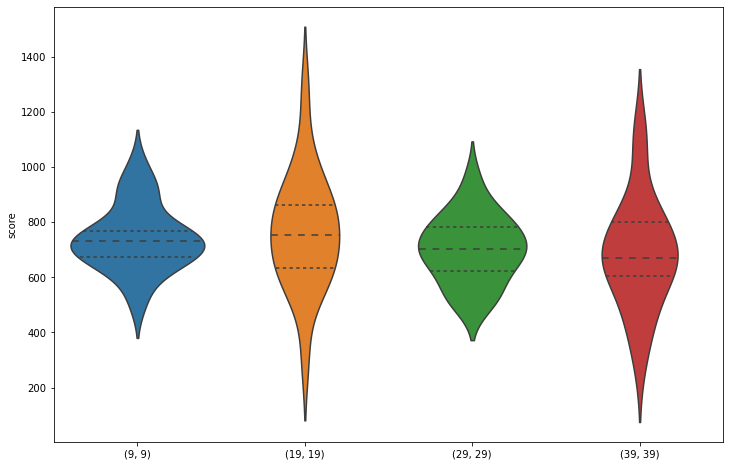

In [20]:
# First let's make a violin plot of the last score for each treatments' replicates.
# You should already have that variable from elsewhere in this notebook.

# If your treatment has multiple columns that represent one treatment
# combination we can combine them into one tuple to group the treatments:
# For example:
#   x=final_steps[['world_width','world_height']].apply(tuple, axis=1)
# if our treatment was world_width and world_height

# So, our violin plot should have the following arguments:
# data = the final steps data frame
# x = what we discussed above
# y = 'score'
# inner='quartile'

sns.violinplot(data=final_steps, \
    x=final_steps[['world_width','world_height']].apply(tuple, axis=1),\
    y='score', inner='quartile')

## Examine the violin plot you made

I want you to answer the question: did my treatments significantly (in a statical sense) change the outcome of playing the game?

The violin plot you made should show the distribution of final scores over all treatments.  With the quartile 'inner' argument, we see the median, 25, and 75th quartiles.  If there is a significant difference in the distributions (e.g. the distribution is shifted) then we can say that the treatments have an effext.

Now your experiment might have obvious differences.  Or obvious non-differences.  But in science we want to test those differences and not just rely on a qualitative visual inspection.  This is where distribution testing comes into play.

## Statistical testing of final result

We're going to jump into a topic many of you may not be familiar with, and that is statistical testing.

Each treatment gives us a distribution of scores that you can see in your violin plot.  The question is: comparing two treatments at a time, is their distribution different?  

There are many kinds of statistical tests that have different requirements to "work".  Here I'm going to assume there is no underlying parameterized distribution (so not normal, or Gaussian, etc.) and use what's called a non-parametric test.

Non parametric tests are useful when your data doesn't fit an expected distribution.  We're going to use what's called a [Mann-Whitney U Test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) to see if there are differences in these distributions.

In the end, let's make a data frame that holds the pair-wise p-values from U-Test comparisons that we've performed.

In [21]:
# First, let's make an dataframe filled with nan (not a number).  
# We'll first need to get our treatment labels.

# If you have multiple treatment variables (e.g. world_width, world_height) then
# we have to transform them (again) to make them a single label.  We'll include
# that as the "label" column in our final step data frame:
#  final_steps['label'] = final_steps[['world_width', 'world_height']].apply(tuple, axis=1)
final_steps['label'] = final_steps[['world_width', 'world_height']].apply(tuple, axis=1)

# If you have only a single treatment variable, just note that column name.  We'll be using it momentarily.

In [22]:
# We're going to get the unique treatment names from our experiment.
# If we have a single label, we can use
#   treatment_names = final_steps['column_name'].unique()
# where column name is whatever the name of the treatment column is

# Otherwise use the column label you created above to handle needing to use multiple columns to make a label
#   treatment_names = final_steps['label'].unique()

treatment_names = final_steps['label'].unique()


In [23]:
# We're going to use the package itertools to make a Cartesian product of our labels
# A cartesian product generates list of all unique combination of elements
# Each element in the list will be a tuple.

# What we're interested in is a list of all possible pairs of these labels.
# So if our list was called treatment_names, we'd use
#   itertools.product(treatment_names, repeat=2)
# The repeat = 2 is saying we want this list to be a Cartesian product of itself and itself
# Let's also convert this immediately to a list so we can see what the result is.
# Let's call this list comparisons.


comparisons = list(itertools.product(treatment_names, repeat=2))

In [24]:
# Let's get ready to store our results

# Now we'll make an empty dataframe and fill it with np.nan
# nan stands for "Not a Number".  It is used when floating point
# numbers have no value.  It's usually an error or missing
# value indicator.  (Integers do not have nan values).

df_utest = pd.DataFrame(np.nan, columns=treatment_names, index=treatment_names, dtype='float')
df_utest

,"(9, 9)","(19, 19)","(29, 29)","(39, 39)"
"(9, 9)",NaN,NaN,NaN,NaN
"(19, 19)",NaN,NaN,NaN,NaN
"(29, 29)",NaN,NaN,NaN,NaN
"(39, 39)",NaN,NaN,NaN,NaN


In [25]:
# Now we can run our tests.  We're looking for the p-values that come out
# of the test.  In science we generally consider something different
# if its p-value (probability of occuring) is < 0.05.  This, of course,
# depends on what you are testing.  0.05 is a good rule of thumb.

# We'll begin by looping over our cartesian products of labels:
# Below I'll use the column we created called label.  But your
# experiment might have a different column that holds the treatment
# labels.
for treatment_a, treatment_b in comparisons:
    dist_a = final_steps[final_steps['label']==treatment_a]['score']
    dist_b = final_steps[final_steps['label']==treatment_b]['score']
    result = sp.stats.mannwhitneyu(dist_a, dist_b)
    df_utest.loc[[treatment_a],[treatment_b]] = result.pvalue
    
df_utest


,"(9, 9)","(19, 19)","(29, 29)","(39, 39)"
"(9, 9)",1.000000,0.776237,0.432559,0.171708
"(19, 19)",0.776237,1.000000,0.213280,0.213237
"(29, 29)",0.432559,0.213280,1.000000,0.569964
"(39, 39)",0.171708,0.213237,0.569964,1.000000


In [26]:
# Save this data frame as the value of f'{experiment_name}-pvalues.csv'
df_utest.to_csv(f'experiment-{experiment_name}-pvalues.csv', index=False)

# Answering the Question

Did you see significant differences between treatments?

For this experiment: Does the world size affect the final score in the game?

When does it or doesn't it?

I would like you to put together a Power Point presentation for your group.  This is not due in class, but you will want to have it ready for Dr. Wisner's class.

I want it to have three slides:

1. A title slide with your names and experiment name
2. A slide explaining the experiment and its justification
3. A slide showing your results